In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
data=pd.read_csv("housing.csv")

In [79]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [80]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [81]:
{col : data[col].unique() for col in data if data[col].dtype == object}

{'ocean_proximity': array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
       dtype=object)}

In [82]:
#we have ocean_proximity column which is  of dtype value
data=data.astype({
    'ocean_proximity' : 'category'
})

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


In [84]:
data_dummies = pd.get_dummies(data['ocean_proximity'],prefix='proximity')

In [85]:
#now concat data_dummies columns with data frame
data = pd.concat([data,data_dummies],axis=1)

In [86]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   longitude             20640 non-null  float64 
 1   latitude              20640 non-null  float64 
 2   housing_median_age    20640 non-null  float64 
 3   total_rooms           20640 non-null  float64 
 4   total_bedrooms        20433 non-null  float64 
 5   population            20640 non-null  float64 
 6   households            20640 non-null  float64 
 7   median_income         20640 non-null  float64 
 8   median_house_value    20640 non-null  float64 
 9   ocean_proximity       20640 non-null  category
 10  proximity_<1H OCEAN   20640 non-null  uint8   
 11  proximity_INLAND      20640 non-null  uint8   
 12  proximity_ISLAND      20640 non-null  uint8   
 13  proximity_NEAR BAY    20640 non-null  uint8   
 14  proximity_NEAR OCEAN  20640 non-null  uint8   
dtypes:

In [88]:
#now drop ocean_proximity column
data.drop(columns='ocean_proximity',inplace=True)

In [89]:
#check correlation
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
proximity_<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018314,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


In [90]:
data.corr()[['median_house_value']].style.background_gradient(cmap='YlOrBr')

,median_house_value
longitude,-0.045967
latitude,-0.144160
housing_median_age,0.105623
total_rooms,0.134153
total_bedrooms,0.049686
population,-0.024650
households,0.065843
median_income,0.688075
median_house_value,1.000000
proximity_<1H OCEAN,0.256617


In [91]:
abs(data.corr())[['median_house_value']].style.background_gradient(cmap='YlOrBr')

,median_house_value
longitude,0.045967
latitude,0.144160
housing_median_age,0.105623
total_rooms,0.134153
total_bedrooms,0.049686
population,0.024650
households,0.065843
median_income,0.688075
median_house_value,1.000000
proximity_<1H OCEAN,0.256617


In [92]:
#get max corr value
data.corr().style.highlight_min(axis=0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
proximity_<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018314,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


In [93]:
#get max
data.corr().style.highlight_max(axis=0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
proximity_<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018314,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


In [94]:
#checking for null values
data.isna().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms          207
population                0
households                0
median_income             0
median_house_value        0
proximity_<1H OCEAN       0
proximity_INLAND          0
proximity_ISLAND          0
proximity_NEAR BAY        0
proximity_NEAR OCEAN      0
dtype: int64

In [95]:
data.isna().sum()/data.shape[0]*100

longitude               0.000000
latitude                0.000000
housing_median_age      0.000000
total_rooms             0.000000
total_bedrooms          1.002907
population              0.000000
households              0.000000
median_income           0.000000
median_house_value      0.000000
proximity_<1H OCEAN     0.000000
proximity_INLAND        0.000000
proximity_ISLAND        0.000000
proximity_NEAR BAY      0.000000
proximity_NEAR OCEAN    0.000000
dtype: float64

In [96]:
#total_bedrooms is full of null value,so let's drop this column
# data.drop(columns='total_bedrooms',inplace=True)
s=data['total_bedrooms'].mode()
data['total_bedrooms'].fillna(value=s,inplace=True)

In [107]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms          0
population              0
households              0
median_income           0
median_house_value      0
proximity_<1H OCEAN     0
proximity_INLAND        0
proximity_ISLAND        0
proximity_NEAR BAY      0
proximity_NEAR OCEAN    0
dtype: int64

In [112]:
data['total_bedrooms']= data['total_bedrooms'].replace(np.nan,s[0])


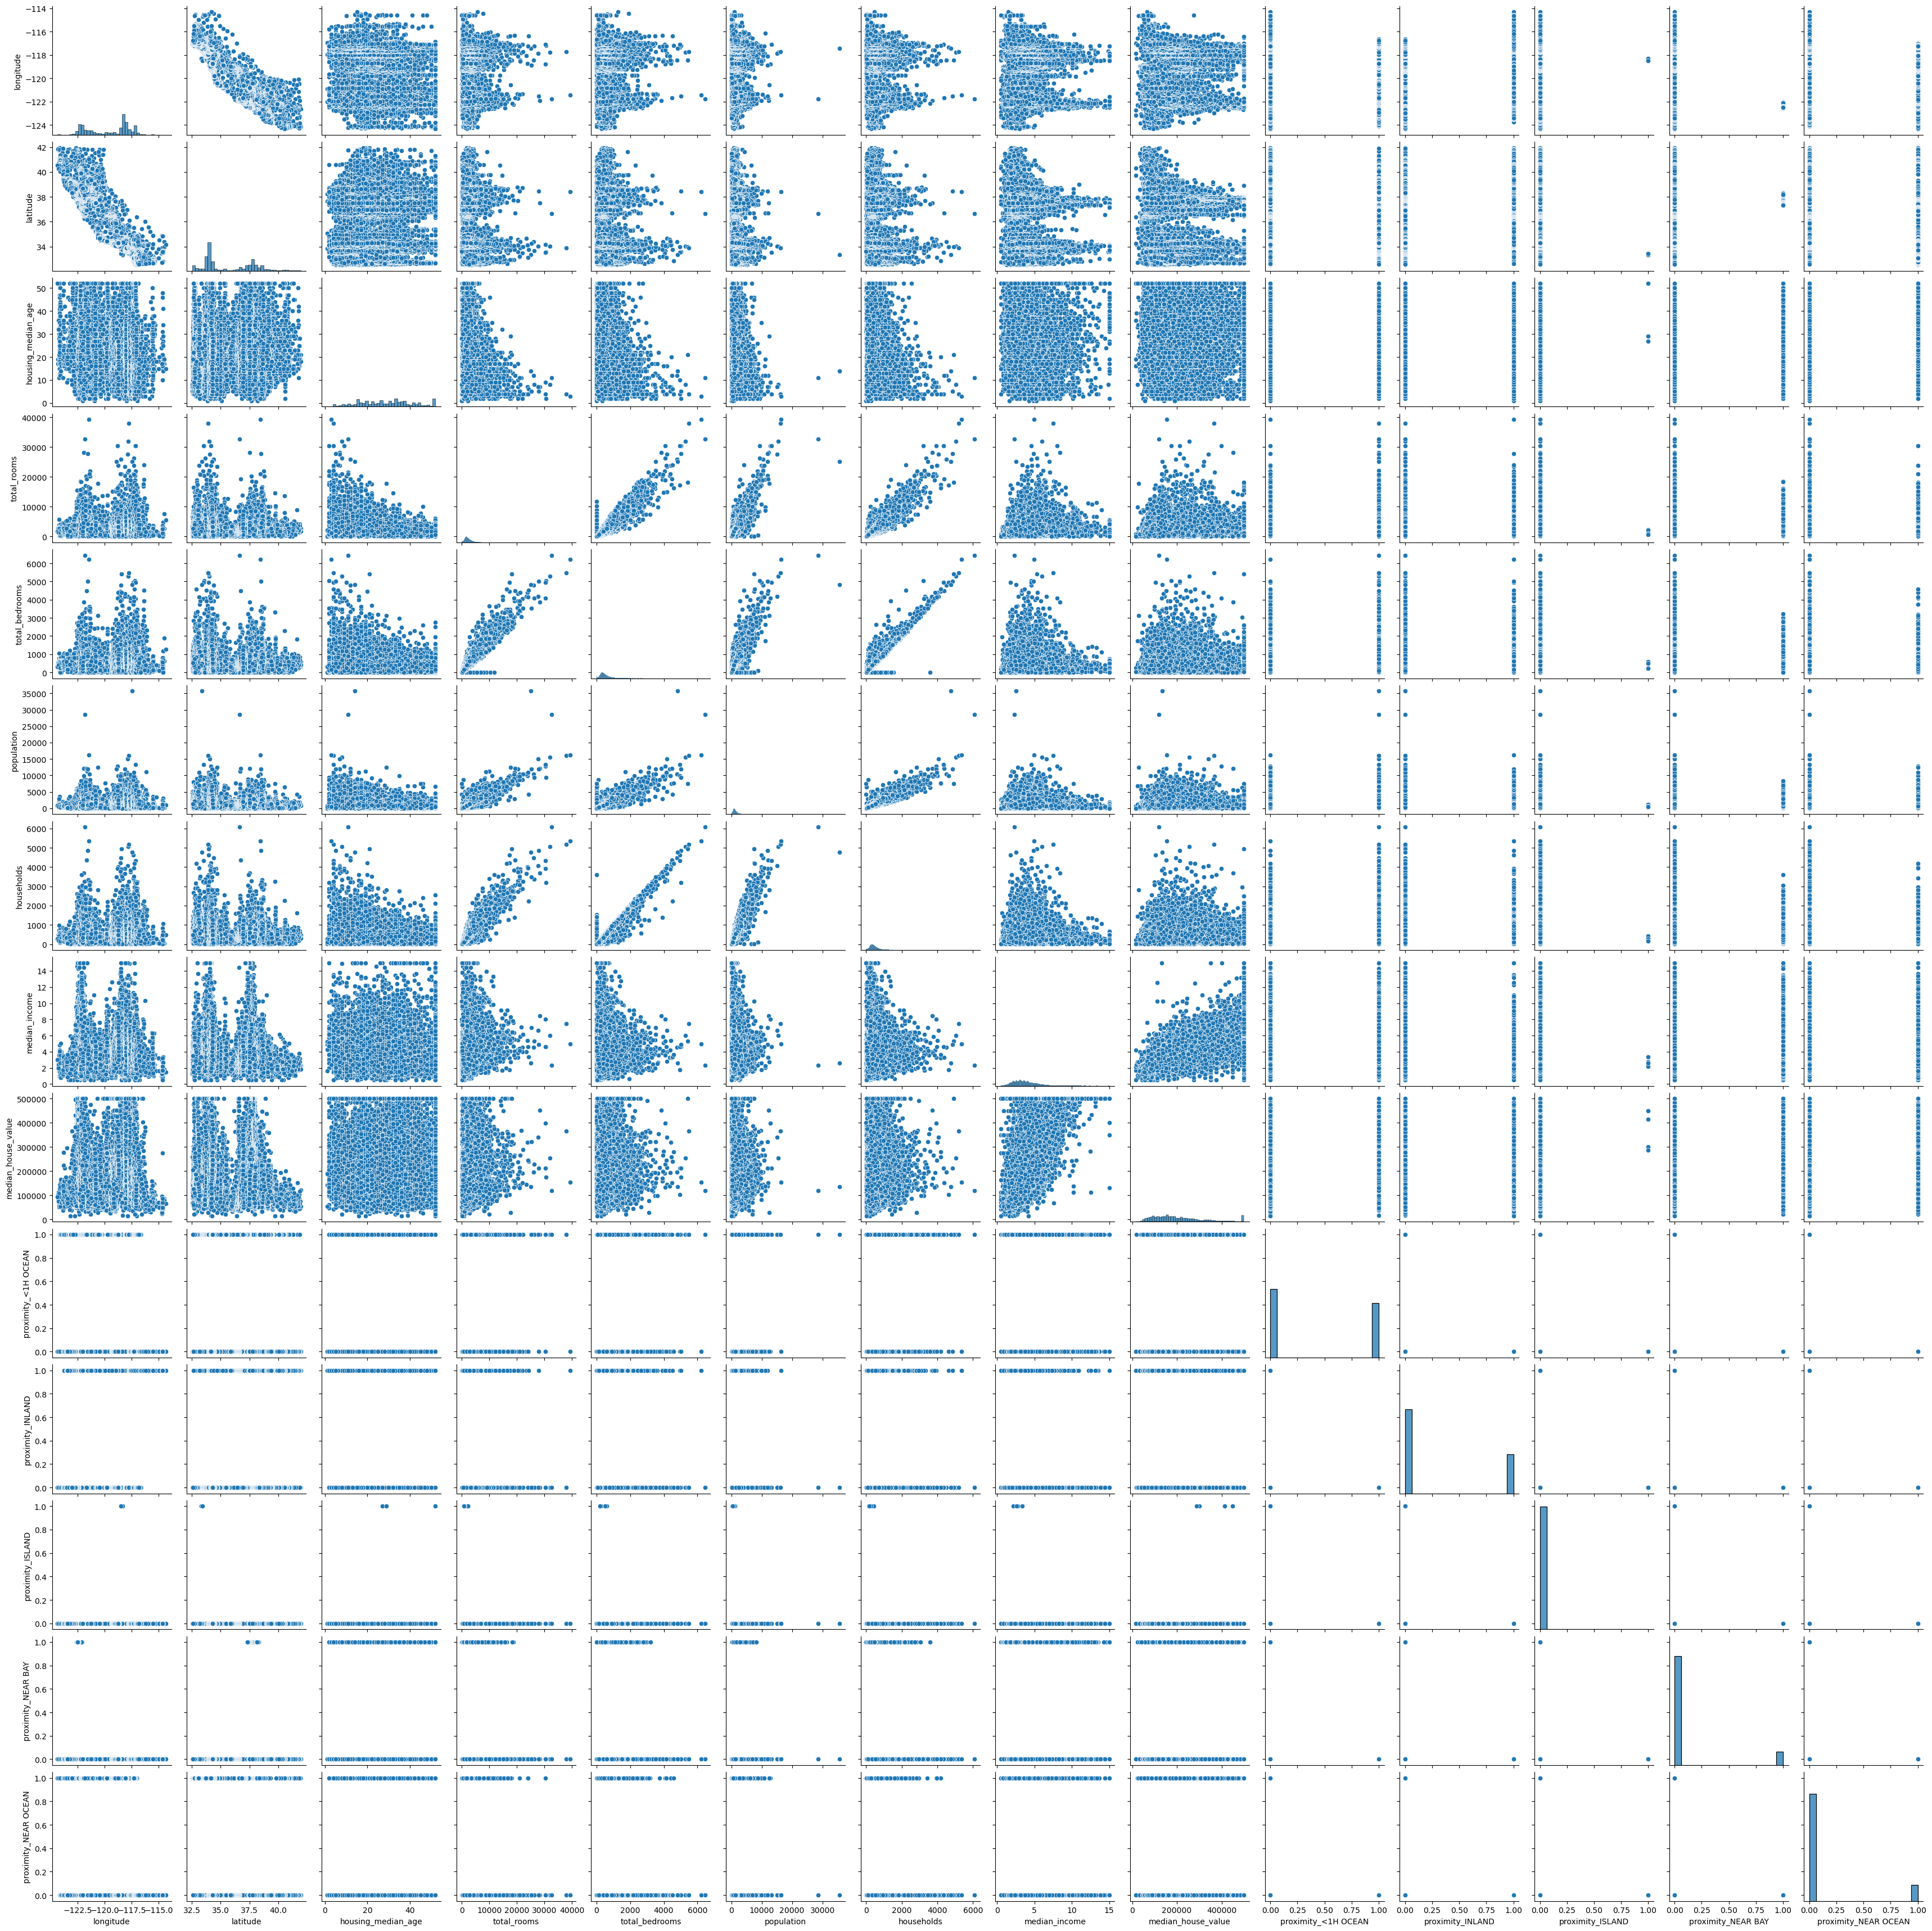

In [113]:
sns.pairplot(data)

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score

In [159]:
X=data.drop(columns=['median_house_value'])
y=data['median_house_value']

In [172]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [173]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x1 = data.drop(['median_house_value'], axis=1)
y1= data['median_house_value']

cols = x1.columns

x1 = scaler.fit_transform(x1) 

In [174]:
lr = LinearRegression()
lr.fit(X_train, y_train)

predict = lr.predict(X_test)

In [175]:
mse = mean_squared_error(y_test, predict)
rmse = mean_squared_error(y_test, predict, squared=False)
r2 = r2_score(y_test, predict)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 4833017866.042269
Root Mean Squared Error (RMSE): 69519.90985352518
R-squared (R^2): 0.6317813194987212


In [176]:
r2_score(y_test, predict)

0.6317813194987212

<Axes: xlabel='median_house_value'>

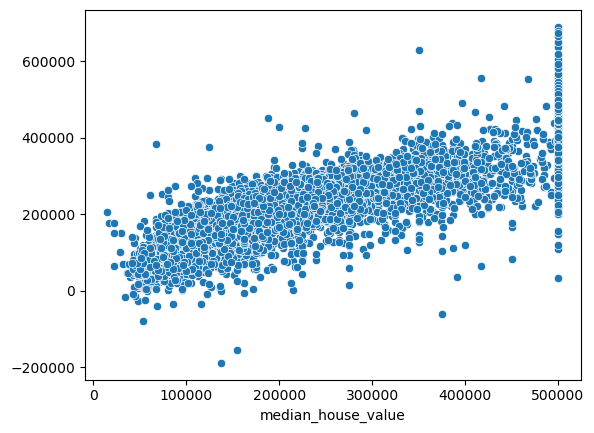

In [166]:
sns.scatterplot(x=y_test, y=predict)